## <center>Exercises 3: Econophysics</center>

In this notebook we will use Monte Carlo tecniques to make estimations of the European call-option and put-option prices at time $t=0$, given a number $M\ge 10^4$ (here $M=10^5$) of asset prices at time $t=T$ on which we will perform data blocking; in our simulations we will divide the $M$ asset prices into $N=100$ blocks of $L=1000$ steps each.
<br> The parameters we will use are the following:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

We will evaluate the call-option and put-option through a direct sampling and a discretized sampling of $S(T)$: the direct sampling consists of directly computing the asset price $S(T)$ at time $T$ without intermediate steps, whereas for the discretized sampling we will sample $S(t_i)$ for $100$ values of $t_i$ in the range $[0,T]$; in both cases we will assume the asset price to follow a geometric brownian motion, that's why we can do these kind of samplings.

### Exercise 1

An efficient financial market can be described with the Markov assumption, as the correlations in the asset price time series are limited only to short ranges of time. We can assume the asset price $S(t)$ to behave as a geometric brownian motion, with price change in little intervals of time $dt$ given by 
$$dS(t) = \sigma S(t) dW(t) + \mu S(t) dt$$
where $\sigma$ is the volatility and defines the stochastic nature of the process while $\mu$ is the drift and holds its deterministic nature.
<br /> Here we are going to compute the European call-option price and put-option price with this previous assumption. For both direct and discretized sampling of $S(t)$, the call-option price and put-option price at time $t=0$ are given by
$$C[S(0),0] = e^{-rT}max(0,S(T)-K)$$
$$P[S(0),0] = e^{-rT}max(0,K-S(T))$$
<br> In fact, for both methods every evaluation of the asset price will be followed by the evaluation of the call-option price and the put-option price via these expressions: this will result in a direct and discretized sampling also for these two quantities.

European options are the only type of options with a price that can be computed analytically. Now we are going to compute the analytical results with Black-Sholes theory, with the following hypothesis:
- efficient market
- the geometric brownian motion that describes $S(t)$ has constant risk-free interest rate $r$ (equal to drift $\mu$) and constant volatility $\sigma$

We will use these analytical solutions for a comparison with the results of the simulations.

In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scipy
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

call, put = black_scholes(S0,K,T,r,sigma)      #exact values computed analytically with Black-Scholes
print("Analytical solution (Black-Scholes):")
print("call: ", call)
print("put: ", put)

Analytical solution (Black-Scholes):
call:  14.975790778311286
put:  5.4595325819072364


#### 1. Direct sampling:

Sampling directly the final asset price $S(T)$ means that we are computing $S(T)$ directly at time $t=T$ as
$$S(T) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)T+\sigma W(T)\right]$$
where $W(T)$ is a normally distributed number with mean $0$ and variance $T$.
<br> The figure below shows the difference between the results of the estimations of the call-option price and put-option price and their correct values.

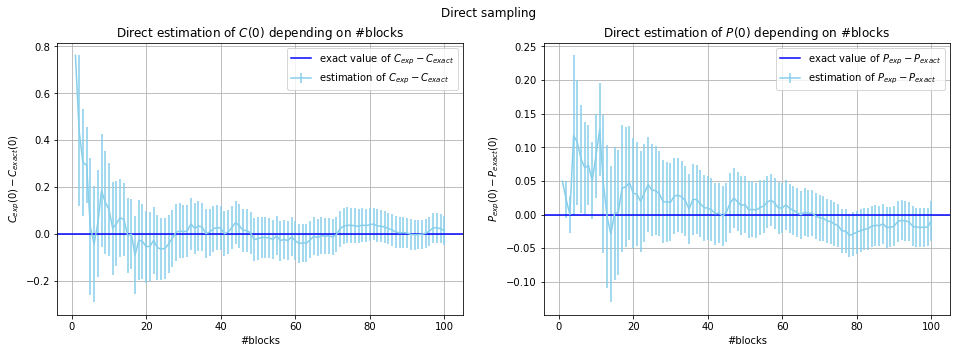

In [7]:
nblocks, c_dir, err_c_dir, p_dir, err_p_dir = np.loadtxt("./ex_1/Output/direct_sampling.out", usecols=(0,1,2,3,4), delimiter=None, unpack='true')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Direct sampling')

ax1.errorbar(nblocks,c_dir-call,yerr=err_c_dir,color='skyblue',label='estimation of $C_{exp}-C_{exact}$')
ax1.axhline(y=0,color='blue',label='exact value of $C_{exp}-C_{exact}$')
ax1.set_xlabel('#blocks')
ax1.set_ylabel(r'$C_{exp}(0)-C_{exact}(0)$')
ax1.set_title('Direct estimation of $C(0)$ depending on #blocks')
ax1.legend(loc='best')
ax1.grid(True)

ax2.errorbar(nblocks,p_dir-put,yerr=err_p_dir,color='skyblue',label='estimation of $P_{exp}-P_{exact}$')
ax2.axhline(y=0,color='blue',label='exact value of $P_{exp}-P_{exact}$')
ax2.set_xlabel('#blocks')
ax2.set_ylabel(r'$P_{exp}(0)-P_{exact}(0)$')
ax2.set_title('Direct estimation of $P(0)$ depending on #blocks')
ax2.legend(loc='best')
ax2.grid(True)

plt.show()

### 2. Discretized sampling:

Now we are going to divide the interval $[0,T]$ into $100$ sub-intervals and sample the discretized geometric brownian motion path of the asset price $S(t_1),...,S(T)$. With $W(T)$ being independent and normally distributed, we can compute each step $S(t_{i+1})$ as
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
where $Z_i$ are normally distributed with mean $0$ and variance $1$.
<br> The figure below shows the difference between the results of the estimations of the call-option price and put-option price and their correct values.

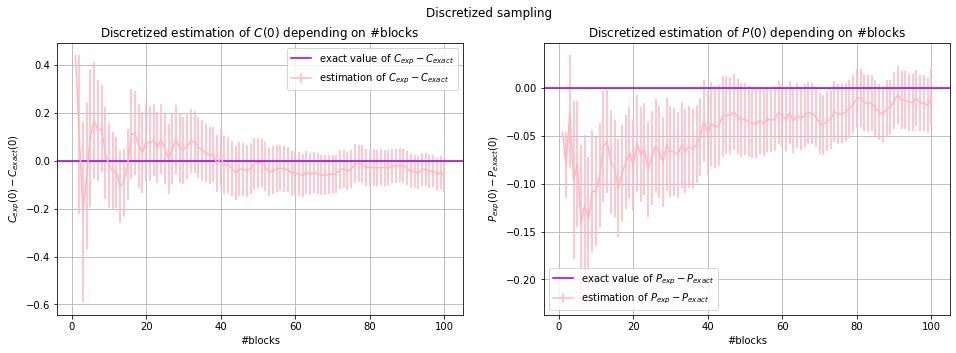

In [8]:
nblocks, c_dis, err_c_dis, p_dis, err_p_dis = np.loadtxt("./ex_1/Output/discretized_sampling.out", usecols=(0,1,2,3,4), delimiter=None, unpack='true')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Discretized sampling')

ax1.errorbar(nblocks,c_dis-call,yerr=err_c_dis,color='lightpink',label='estimation of $C_{exp}-C_{exact}$')
ax1.axhline(y=0,color='darkviolet',label='exact value of $C_{exp}-C_{exact}$')
ax1.set_xlabel('#blocks')
ax1.set_ylabel(r'$C_{exp}(0)-C_{exact}(0)$')
ax1.set_title('Discretized estimation of $C(0)$ depending on #blocks')
ax1.legend(loc='best')
ax1.grid(True)

ax2.errorbar(nblocks,p_dis-put,yerr=err_p_dis,color='lightpink',label='estimation of $P_{exp}-P_{exact}$')
ax2.axhline(y=0,color='darkviolet',label='exact value of $P_{exp}-P_{exact}$')
ax2.set_xlabel('#blocks')
ax2.set_ylabel(r'$P_{exp}(0)-P_{exact}(0)$')
ax2.set_title('Discretized estimation of $P(0)$ depending on #blocks')
ax2.legend(loc='best')
ax2.grid(True)

plt.show()

#### General conclusions:

Both direct and discretized sampling have given us good results for the estimation of the call-option and put-option prices: the difference between the sampled and the correct values are null within the errorbars in both cases.
<br> The two estimations (direct and discretized) are also in agreement with each other, as we can see in the graph below where we represent direct and discretized estimation and correct value for both the call-option and the put-option prices.

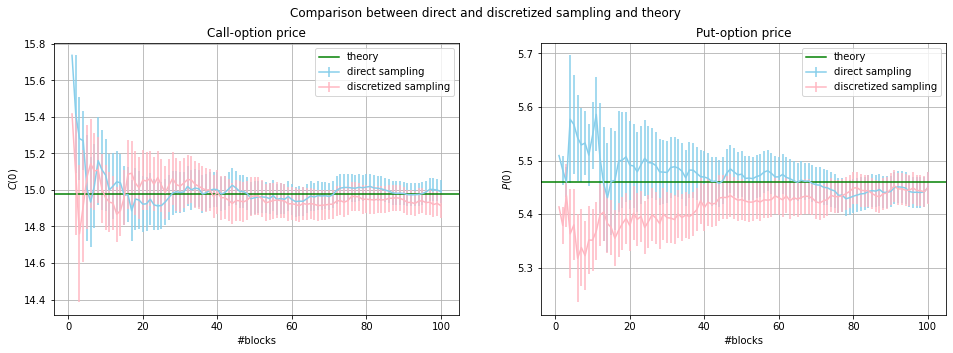

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Comparison between direct and discretized sampling and theory')

ax1.errorbar(nblocks,c_dir,yerr=err_c_dir,color='skyblue',label='direct sampling')
ax1.errorbar(nblocks,c_dis,yerr=err_c_dis,color='lightpink',label='discretized sampling')
ax1.axhline(y=call,color='green',label='theory')
ax1.set_xlabel('#blocks')
ax1.set_ylabel(r'$C(0)$')
ax1.set_title('Call-option price')
ax1.legend(loc='best')
ax1.grid(True)

ax2.errorbar(nblocks,p_dir,yerr=err_p_dir,color='skyblue',label='direct sampling')
ax2.errorbar(nblocks,p_dis,yerr=err_p_dis,color='lightpink',label='discretized sampling')
ax2.axhline(y=put,color='green',label='theory')
ax2.set_xlabel('#blocks')
ax2.set_ylabel(r'$P(0)$')
ax2.set_title('Put-option price')
ax2.legend(loc='best')
ax2.grid(True)

plt.show()